In [7]:
import pandas as pd
final=pd.read_csv("C:\\Users\\Admin34\\Desktop\\4k.2C.csv")

In [13]:
from scipy.sparse import coo_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [1]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nltk.download('wordnet')
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin34\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


stemming: invers
lemmatization: inversely


In [4]:
##Creating a list of stop words and adding custom stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin34\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
corpus = []
for i in range(0, 2000):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', final['Review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [ ]:
### wordcloud code ###

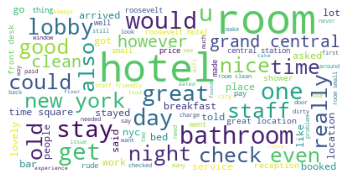

In [11]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [14]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [15]:
list(cv.vocabulary_.keys())[:10]  ## frequent words

['dirty',
 'curtain',
 'filthy',
 'totally',
 'priced',
 'tourist',
 'tax',
 'rip',
 'also',
 'nyc']

[Text(0, 0, 'room'),
 Text(1, 0, 'hotel'),
 Text(2, 0, 'staff'),
 Text(3, 0, 'location'),
 Text(4, 0, 'time'),
 Text(5, 0, 'stay'),
 Text(6, 0, 'great'),
 Text(7, 0, 'lobby'),
 Text(8, 0, 'would'),
 Text(9, 0, 'good'),
 Text(10, 0, 'bathroom'),
 Text(11, 0, 'night'),
 Text(12, 0, 'day'),
 Text(13, 0, 'bed'),
 Text(14, 0, 'clean'),
 Text(15, 0, 'stayed'),
 Text(16, 0, 'roosevelt'),
 Text(17, 0, 'old'),
 Text(18, 0, 'bar'),
 Text(19, 0, 'check')]

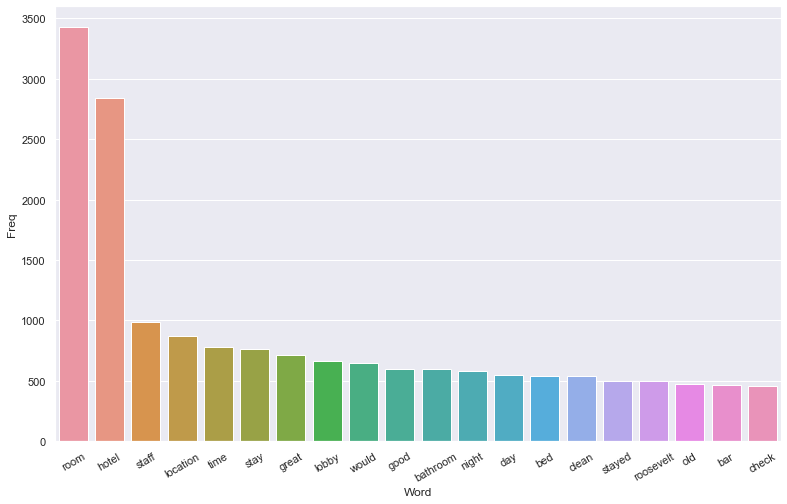

In [16]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [18]:
corpus = []
for i in range(0, 2029):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', final['Review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text] 
    text = " ".join(text)
    corpus.append(text)

[('room wa', 556),
 ('new york', 315),
 ('grand central', 247),
 ('time square', 241),
 ('hotel wa', 169),
 ('roosevelt hotel', 166),
 ('great location', 166),
 ('front desk', 161),
 ('central station', 161),
 ('bathroom wa', 120)]
           Bi-gram  Freq
0          room wa   556
1         new york   315
2    grand central   247
3      time square   241
4         hotel wa   169
5  roosevelt hotel   166
6   great location   166
7       front desk   161
8  central station   161
9      bathroom wa   120


[Text(0, 0, 'room wa'),
 Text(1, 0, 'new york'),
 Text(2, 0, 'grand central'),
 Text(3, 0, 'time square'),
 Text(4, 0, 'hotel wa'),
 Text(5, 0, 'roosevelt hotel'),
 Text(6, 0, 'great location'),
 Text(7, 0, 'front desk'),
 Text(8, 0, 'central station'),
 Text(9, 0, 'bathroom wa')]

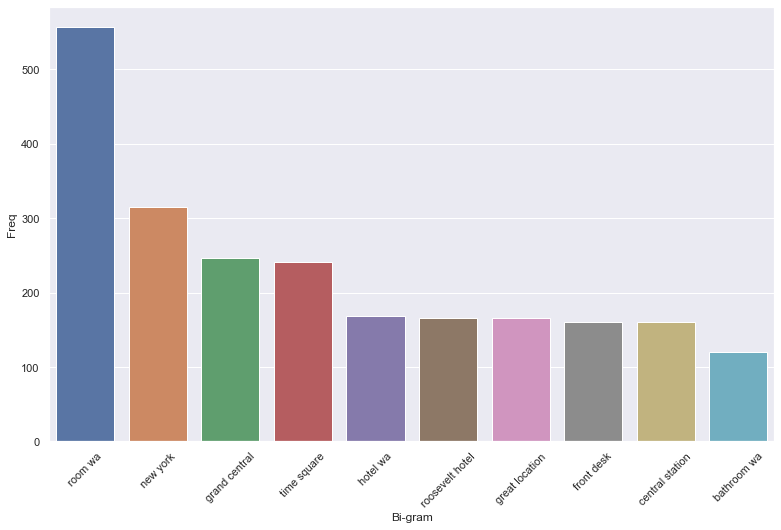

In [19]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    
    index = []
    for t in words_freq:
        if (t[0].partition(' ')[0] in stop_words) or (t[0].partition(' ')[-1] in stop_words):
            index.append(words_freq.index(t))
            

    for i in sorted(index, reverse = True):
        del words_freq[i]
        
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=10)
from pprint import pprint
pprint(top2_words)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [20]:
corpus_trigram = []
for i in range(0, 2029):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', final['Review'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text] 
    text = " ".join(text)
    corpus_trigram.append(text)

In [21]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    index = []
    for t in words_freq:
        if (t[0].partition(' ')[0] in stop_words) or (t[0].partition(' ')[-1].partition(' ')[-1] in stop_words):
            index.append(words_freq.index(t))
            

    for i in sorted(index, reverse = True):
        del words_freq[i]
    return words_freq[:n]

                  Tri-gram  Freq
0    grand central station   141
1     friendly and helpful    74
2              check in wa    56
3            room wa clean    47
4       lobby is beautiful    43
5  within walking distance    40
6        location is great    37
7           close to grand    37
8   coffee making facility    35
9            room wa small    32


[Text(0, 0, 'grand central station'),
 Text(1, 0, 'friendly and helpful'),
 Text(2, 0, 'check in wa'),
 Text(3, 0, 'room wa clean'),
 Text(4, 0, 'lobby is beautiful'),
 Text(5, 0, 'within walking distance'),
 Text(6, 0, 'location is great'),
 Text(7, 0, 'close to grand'),
 Text(8, 0, 'coffee making facility'),
 Text(9, 0, 'room wa small')]

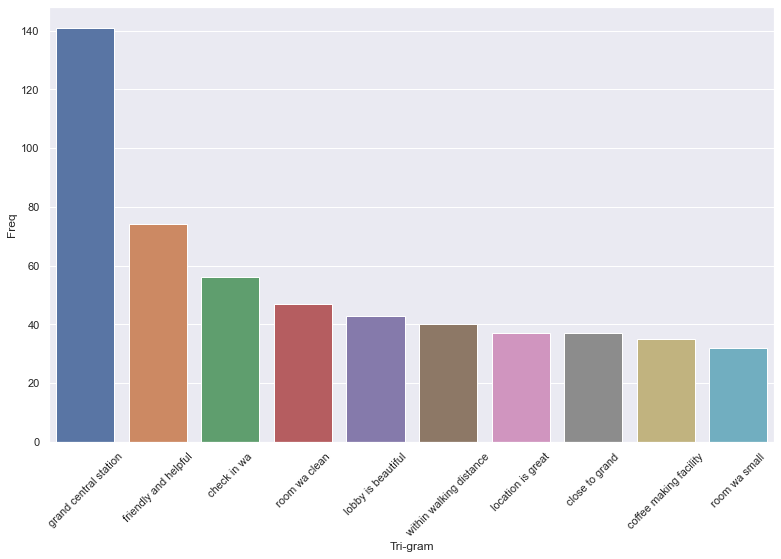

In [22]:
top3_words = get_top_n3_words(corpus_trigram, n=10)

top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams

sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [23]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[100]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [24]:
#Function for sorting tf_idf in descending order
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
arrived early a that wa our flight charged for early check in whilst checking in wa told to use a code for free wifi when checking out found out we had been charged a day for facility fee at no point we re we informed of these hidden charge no tea coffee facility in room or in hotel after a certain time breakfast wa edible but not worth the money it cost bed wa comfortable room wa clean but window didn t shut properly so very noisy i appreciate it s an older building but doe need updating kind of felt like we were staying in the tower of terror at time location wa ok though

Keywords:
checking 0.19
charged 0.184
early 0.181
window shut 0.166
tower terror 0.166


In [ ]:
###Remove the stop words which are not required ###